In [29]:
from manager import load_obj, save_obj
import os
import re
import string
from collections import Counter
from pprint import pprint
from tqdm.notebook import tqdm
from itertools import combinations
import textdistance
import json

In [2]:
works = load_obj("cleaned_corpus")

In [3]:
count= 0
for work in works:
    if work.references != "none":
        count += 1

In [4]:
count

502

# Load namelist and introduce compare algorithms

In [5]:
with open('names_with_work.txt', encoding= "utf-8") as f:
    lines = [line.rstrip() for line in f]

In [6]:
aut_dic ={}
for line in lines:
    names = line.split("\t")
    aut_dic[names[0]] = names[1:]

In [9]:
def is_author(author, compare):
    """
        Arguments:
            author: a string of an author name
            compare: a string of another author name to compare with
        -checks if two author names are the same (e.g. Friedrich W. Nietzsche, F. Nietzsche)
        Returns:
            True if names are equal, False if names are not equal
           
    """
    name = author.split(" ")
    name = list(filter(None, name))

    name_compare = compare.split(" ")
    name_compare = list(filter(None, name_compare))
    flag = False
    full_name_flag = False
    if len(name) >= len(name_compare):
        prob = len(name_compare)
        tmp = name_compare
        name_compare = name
        name = tmp
    else:
        prob = len(name)
    new_prob = 0   

    beginners_n = [x[0] for x in name]
    beginners_nc = [x[0] for x in name_compare]
    
    
    
    for n in beginners_n:
        if n in beginners_nc:
            beginners_nc.remove(n)
        else:
            return False
            
    for i, n in enumerate(name):
            
            for j,nc in enumerate(name_compare):
                if (i==j) and (nc == n):
                    new_prob +=1
            
            if new_prob/prob > 0.5:
                return True
            
            elif n[0] not in (x[0] for x in name_compare):
                flag = False
                break

                
            elif (len(n) > 1) and n in name_compare:
                flag = True
                full_name_flag = True
    
            else:
              
                for nc in name_compare:
                    if (n[0] == nc[0]) and ((len(nc) == 1) or (len(n) == 1)):
                        flag = True    
                        
                    elif(n[0] == nc[0]):
                        control = min(len(n), len(nc))
                        if n[:control]!= nc[:control]:
                            return False
                    
                    
    if flag and full_name_flag:
        return True
    else:
        return False

In [10]:
single_aut={}
for key, value in tqdm(aut_dic.items()):
    auts = [x.translate(str.maketrans('', '', string.punctuation)) for x in value]
    
    if len(value) > 1:
        single_aut[key]=[auts[0]] 
    
    
        for name in auts[1:]:
            flag= False
            for n in single_aut[key]:
                if is_author(name, n):
                    flag = True
            if not flag:
                single_aut[key].append(name)

    elif len(value) == 1:
        
        single_aut[key]=[auts[0]]
        
    else:
        continue

  0%|          | 0/502 [00:00<?, ?it/s]

In [11]:
single_aut

{'https://www.hausarbeiten.de/document/889420': ['barner wilfried',
  'brake michael lars',
  'glanz berit',
  'glaser peter',
  'hertwig johannes',
  'schlegel friedrich',
  'schmitzemans monika „der'],
 'https://www.hausarbeiten.de/document/1180614': ['schiller friedrich',
  'alt peterandr',
  'luserkejaqui matthias',
  'middel carina',
  'nilges yvonne',
  'schmidhäuser eberhard',
  'borgards roland',
  'martus steffen',
  'vogl joseph',
  'mazza ethel',
  'willems gottfried'],
 'https://www.hausarbeiten.de/document/1035784': ['lovecraft hp',
  'stoker bram',
  'amann wilhelm',
  'frenschkowski marco',
  'freyermuth gundolf s',
  'glaser frank',
  'günzel stephan',
  'hanke christiane',
  'jones mark',
  'kreienbrink mattias',
  'mai anna',
  'mersch dieter',
  'murray chris',
  'neeb christian',
  'neubauer paul',
  'pacher jörg',
  'peak david',
  'pranz sebastian',
  'sanin andrey',
  'schell jesse',
  'smith don g hp',
  'sprödefeld paula',
  'wilson eric',
  'zaidan sarah pilbe

In [12]:
count=0
for key,value in aut_dic.items():
      count+=len(aut_dic[key])
print("Total number of authors: " +str(count))

Anzahl der Autor:innennennungen gesamt: 5207


In [13]:
count=0
for key,value in single_aut.items():
      count+=len(single_aut[key])
print("Total number of author mentions (without multiple mentions in a bibliography): " +str(count))

Anzahl der Autor:innennennungen gesamt (ohne Mehrfachnennungen in einer Bibliographie): 4610


# Process to normalize the authors


In [14]:
#list of all names occuring in the works (same name in one work is appears only once in list)
list_of_all_names=[]
for key,value in single_aut.items():
    list_of_all_names+= value

In [15]:
test={}
test[list_of_all_names[0]]= [list_of_all_names[0]]
for name in tqdm(list_of_all_names[1:]):
    compare = list(test)
    flag = True
    
    for n in compare:
        if is_author(n,name):
            test[n].append(name)
            flag=False
            break
        else:
            continue
    if flag:
        test[name]=[name]

  0%|          | 0/4609 [00:00<?, ?it/s]

In [16]:
test = dict(sorted(test.items(), key=lambda item: len(item[1]), reverse = True))

In [17]:
test

{'goethe johann wolfgang': ['goethe johann wolfgang',
  'johann wolfgang',
  'goethe johann wolfgang',
  'goethe johann',
  'goethe johann wolfgang',
  'goethe johann wolfgang',
  'goethe johann wolfgang',
  'goethe johann wolfgang',
  'johann wolfgang von goethe',
  'johann wolfgang goethe',
  'goethe johann',
  'johann wolfgang goethe',
  'goethe johann wolfgang',
  'goethe johann wolfgang',
  'johann wolfgang von goethe',
  'goethe johann wolfgang',
  'goethe johann',
  'goethe johann',
  'goethe johann',
  'goethe johann wolfgang',
  'goethe johann wolfgang',
  'goethe johann',
  'goethe johann wolfgang',
  'goethe johann',
  'goethe johann',
  'goethe johann wolfgang',
  'goethe johann wolfgang',
  'johann wolfgang goethe',
  'johann wolfgang goethe',
  'goethe johann wolfgang',
  'j w goethe',
  'goethe johann wolfgang',
  'goethe johann'],
 'bumke joachim': ['bumke joachim',
  'bumke joachim',
  'bumke joachim',
  'bumke joachim',
  'bumke joachim',
  'bumke joachim',
  'bumke j

In [18]:
count=0
for v in test.values():
    count+=len(v)
print("Number of all author mentions (without multiple mentions in one paper): " + str(count))

Anzahl aller Autor:innennennungen (ohne Mehrfachnungen in einer Arbeit): 4610


# Summarize names and count the occurences in different works

In [21]:
final = {}
for k,v in test.items():
    final[k] = len(v)
final = dict(sorted(final.items(), key=lambda item: item[1], reverse = True))

In [22]:
final

{'goethe johann wolfgang': 33,
 'bumke joachim': 22,
 'dürrenmatt friedrich': 11,
 'lessing gotthold ephraim': 11,
 'schiller friedrich': 10,
 'mann thomas „der': 10,
 'nietzsche friedrich': 9,
 'freud sigmund': 8,
 'hoffmann eta': 8,
 'adorno theodor w': 8,
 'bußmann hadumod': 8,
 'hartmann von': 8,
 'wilpert gero': 8,
 'fleischer wolfgang': 7,
 'franz kafka': 7,
 'martinez matias': 7,
 'grimm jacob': 7,
 'büchner georg': 6,
 'arnold heinz': 6,
 'ruh kurt': 6,
 'weddige hilkert': 6,
 'heinzle joachim': 6,
 'wolfram von eschenbach': 6,
 'foucault michel': 6,
 'brecht bertolt': 6,
 'bachmann ingeborg': 6,
 'polenz von peter': 6,
 'alt peterandr': 5,
 'meier albert': 5,
 'knopf jan friedrich': 5,
 'martini fritz': 5,
 'hermand jost': 5,
 'celan paul': 5,
 'gadamer hansgeorg': 5,
 'kant immanuel': 5,
 'eco umberto': 5,
 'haug walter': 5,
 'lewandowski theodor': 5,
 'scheffel michael': 5,
 'neumann gerhard': 5,
 'schröder werner': 5,
 'emmerich wolfgang': 5,
 'wehrli max': 5,
 'jost schnei

In [23]:
test = [x for x in final.values() if x>=2]
print("Number of authors who appear more than once: " +str(len(test)))

Anzahl der Autoren die mehr als einmal vorkommen: 534


In [24]:
print("Number of different authors: " + str(len(final.keys())))

Anzahl verschiedener Autor:innen: 3610


In [25]:
count = 0
for v in final.values():
    if v == 1:
        count+=1
print("Number of authors mentioned only once: " + str(count))

Anzahl an Autor:innen die nur einmal erwähnt werden: 3076


In [33]:
with open("reference_lines.json", "r", encoding="utf-8") as read_file:
    data = json.load(read_file)

In [43]:
lines= 0
for key, value in data.items():
    lines+= len(value)
print("Number of reference lines: " + str(lines))

Anzahl der Reference Lines: 7133


# Zipf Distribution of author occurrences


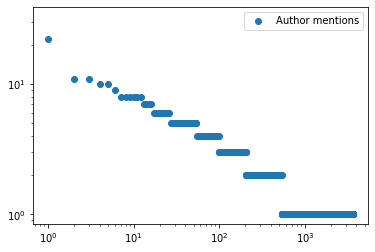

In [26]:
import matplotlib.pyplot as plt
x = len(final)
y = sorted(final.values(), reverse=True)
plt.scatter(range(x), y,label="Author mentions")
plt.yscale('log')
plt.xscale('log')
plt.legend()

# Most occuring authors


['goethe johann wolfgang', 'bumke joachim', 'dürrenmatt friedrich', 'lessing gotthold ephraim', 'schiller friedrich', 'mann thomas „der', 'nietzsche friedrich', 'freud sigmund', 'hoffmann eta', 'adorno theodor w', 'bußmann hadumod', 'hartmann von', 'wilpert gero', 'fleischer wolfgang', 'franz kafka', 'martinez matias', 'grimm jacob', 'büchner georg', 'arnold heinz', 'ruh kurt']
[33, 22, 11, 11, 10, 10, 9, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 6, 6, 6]


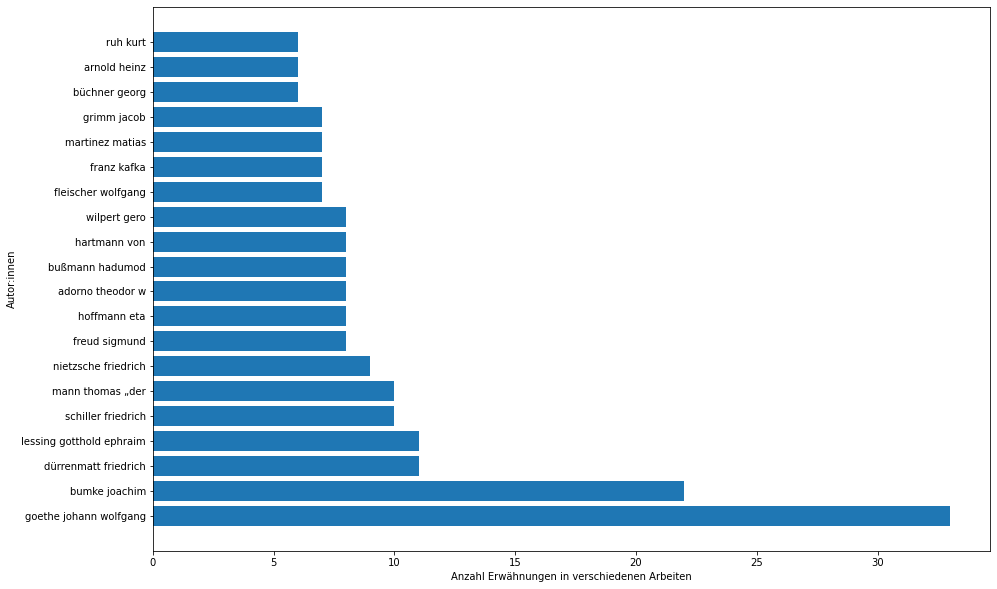

In [27]:
import matplotlib.pyplot as plt
   
name = [k for k in list(final.keys())[:20]]
nums = [n for n in list(final.values())[:20]]
print(name)
print(nums)

plt.figure(figsize=(15,10))
plt.barh(name,nums)
plt.ylabel('Autor:innen')
plt.xlabel('Anzahl Erwähnungen in verschiedenen Arbeiten')


plt.show()
